# Environment Analysis
NAME: Edward Tan Yuan Chong

## Importing necessary libraries

In [1]:
# Import libraries used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm

c:\Users\edw4r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Functions to be used
- removeOutliers function: Remove outliers (data past upper/lower fence)
- summarise function: Collation of summary functions from pandas such as .info(), .sample(), .head() , .tail(), .shape, .size, .nunique(), .isnull().sum()
- dropValues function: Drop NaN values with .dropna() and duplicate values with .drop_duplicates()
- printMissing function: Uses .isnull().sum() to print number of missing values in given dataset

In [2]:
def removeOutliers(dataset):
    q1,q3 = np.percentile(dataset,[25,75])
    valueIQR = q3-q1
    upperFence = q3+1.5*valueIQR
    lowerFence = q1-1.5*valueIQR
    dataset = dataset[dataset<upperFence]
    dataset = dataset[dataset>lowerFence]
    return dataset

def summarise(dataset):
    print("Information of dataset:")
    dataset.info()
    print("\nSample of dataset:\n" + str(dataset.sample()))
    print("\nHead of dataset:\n" + str(dataset.head(1)) + "\nTail of dataset:\n" + str(dataset.tail(1)))
    print("\nShape of dataset: " + str(dataset.shape) + '\t Size of dataset:' + str(dataset.size))
    print("\nNumber of unique values per column in dataset:\n" + str(dataset.nunique()))
    print("\nNumber of missing data in dataset:\n" + str(dataset.isnull().sum()))

def dropValues(dataset):
    dataset.dropna(inplace=True)
    dataset.drop_duplicates(inplace=True)
    return dataset

def printMissing(dataset,context):
    if(context == "before"):
        print("Number of missing values before cleaning:\n" + str(dataset.isnull().sum()))
    elif(context == 'after'):
        print("Number of missing values after cleaning:\n" + str(dataset.isnull().sum()))
    else:
        print("Number of missing values:\n" + str(dataset.isnull().sum()))
    
# Lambda function to be used with .apply() later on
divide = lambda x: x/1000000

## Importing datasets on environment
- Used pandas .read_csv() to import files

In [3]:
# OWID DATASETS
emissionCO2byFuel = pd.read_csv("./co2-emissions-by-fuel-line.csv")
electricitySources = pd.read_csv("./share-elec-by-source.csv")
electricityGeneration = pd.read_csv("./electricity-generation.csv")

# DATAGOV DATASETS
electricityAccount = pd.read_csv("./number-of-electricity-accounts-by-sub-sector-total-2005-to-jun-2021.csv")
naturalGasConsumption = pd.read_csv("./natural-gas-consumption-by-sub-sector-2009-to-2020.csv")

# Dataset Cleaning & Wrangling

### Cleaning dataset #1 on electricity accounts

- .rename() to rename columns
- .sample() for sample of dataset

In [4]:
printMissing(electricityAccount,context=None)

# Rename column for merging later
electricityAccount.rename(columns={"year":"Year"},inplace=True)

electricityAccount.sample(5)

Number of missing values:
year                              0
sector                            0
sub_sector                        0
number_of_electricity_accounts    0
dtype: int64


,Year,sector,sub_sector,number_of_electricity_accounts
126,2012,Commerce and Services-related,Wholesale and Retail Trade,35210
152,2013,Transport-Related,Transport-related,3140
57,2008,Commerce and Services-related,Real Estate Activities,19660
203,2016,Transport-Related,Transport-related,3730
43,2007,Industrial-related,Construction,6160


In [5]:
# Information of dataset #1
electricityAccount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            289 non-null    int64 
 1   sector                          289 non-null    object
 2   sub_sector                      289 non-null    object
 3   number_of_electricity_accounts  289 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.2+ KB


### Cleaning dataset #2 on energy sources

- .rename() to rename columns
- .bfill() to backwards fill missing values
- .tail(5) to print last 5 rows of dataset

In [6]:
# Filter to SG and data from 2005 onwards only
electricitySources = electricitySources[electricitySources['Entity'] == 'Singapore'].query('Year > 2004')

printMissing(electricitySources,context='before')

# Rename columns for easier understanding
electricitySources.rename(columns={
       'Coal (% electricity)':"Coal",
       'Gas (% electricity)':"Gas",
       'Hydro (% electricity)':"Hydro",
       'Solar (% electricity)':'Solar',
       'Wind (% electricity)':'Wind',
       'Oil (% electricity)':'Oil',
       'Nuclear (% electricity)':'Nuclear',
       'Other renewables excluding bioenergy (% electricity)':'Other renewables',
       'Bioenergy (% electricity)':'Bioenergy'},inplace=True)

electricitySources.bfill(axis=0,inplace=True)

printMissing(electricitySources,context='after')

electricitySources.tail(5)

Number of missing values before cleaning:
Entity                                                  0
Code                                                    0
Year                                                    0
Coal (% electricity)                                    0
Gas (% electricity)                                     0
Hydro (% electricity)                                   0
Solar (% electricity)                                   1
Wind (% electricity)                                    0
Oil (% electricity)                                     1
Nuclear (% electricity)                                 0
Other renewables excluding bioenergy (% electricity)    0
Bioenergy (% electricity)                               0
dtype: int64
Number of missing values after cleaning:
Entity              0
Code                0
Year                0
Coal                0
Gas                 0
Hydro               0
Solar               0
Wind                0
Oil                 0
Nuclear   

,Entity,Code,Year,Coal,Gas,Hydro,Solar,Wind,Oil,Nuclear,Other renewables,Bioenergy
5522,Singapore,SGP,2017,0.0,95.353050,0.0,0.474965,0.0,3.540535,0.0,0.0,0.764434
5523,Singapore,SGP,2018,0.0,95.685730,0.0,0.474965,0.0,2.995169,0.0,0.0,0.831189
5524,Singapore,SGP,2019,0.0,95.381645,0.0,0.792271,0.0,2.995169,0.0,0.0,0.830918
5525,Singapore,SGP,2020,0.0,95.184746,0.0,0.982704,0.0,3.007075,0.0,0.0,0.825472
5526,Singapore,SGP,2021,0.0,94.932686,0.0,1.252805,0.0,2.991773,0.0,0.0,0.822737


In [7]:
# Information of dataset #2
electricitySources.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 5510 to 5526
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            17 non-null     object 
 1   Code              17 non-null     object 
 2   Year              17 non-null     int64  
 3   Coal              17 non-null     float64
 4   Gas               17 non-null     float64
 5   Hydro             17 non-null     float64
 6   Solar             17 non-null     float64
 7   Wind              17 non-null     float64
 8   Oil               17 non-null     float64
 9   Nuclear           17 non-null     float64
 10  Other renewables  17 non-null     float64
 11  Bioenergy         17 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ KB


### Cleaning dataset #3 on electricity generation

- Boolean indexing and .query() to filter data
- .rename() to rename columns
- .isnull().sum() to print number of missing values
- .OLS.from_formula() creates an ordinary least squares (OLS) model [method for fitting linear regression models] from the formula and data given, along with .fit() to fit the OLS model to the data
- .OLS.from_formula().fit() are two functions used together to help to fit a linear regression model to the dataset
- .predict() is used to generate predictions based on the given OLS model, to help to create a new predicted dataset, while filling in missing values to be used.
- .tail(5) to print out last 5 rows of dataset

In [8]:
# Filter to SG and data from 2005 onwards only
electricityGeneration = electricityGeneration[electricityGeneration['Entity'] == 'Singapore'].query('Year > 2004')

electricityGeneration.rename(columns={"Electricity generation (TWh)":"Electricity_Generation"},inplace=True)

# Using regression imputation to fill missing values
print("Number of missing values before regression imputation:\n" + str(electricityGeneration.isnull().sum()))

# Fill in missing values with regression imputation
electricityGenerationModel = sm.OLS.from_formula("Electricity_Generation ~ Year",data=electricityGeneration).fit()

# Predicted values
electricityGenerationPredicts = electricityGenerationModel.predict(electricityGeneration['Year'])

# Replace columns (with and without missing values) with new predicted values
electricityGeneration['Electricity_Generation'] = electricityGenerationPredicts

print("Number of missing values after regression imputation:\n" + str(electricityGeneration.isnull().sum()))

electricityGeneration.tail(5)

Number of missing values before regression imputation:
Entity                    0
Code                      0
Year                      0
Electricity_Generation    2
dtype: int64
Number of missing values after regression imputation:
Entity                    0
Code                      0
Year                      0
Electricity_Generation    0
dtype: int64


,Entity,Code,Year,Electricity_Generation
5666,Singapore,SGP,2017,49.483518
5667,Singapore,SGP,2018,50.483730
5668,Singapore,SGP,2019,51.483943
5669,Singapore,SGP,2020,52.484156
5670,Singapore,SGP,2021,53.484369


In [9]:
# Information of dataset #3
electricityGeneration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 5654 to 5670
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  17 non-null     object 
 1   Code                    17 non-null     object 
 2   Year                    17 non-null     int64  
 3   Electricity_Generation  17 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 680.0+ bytes


### Cleaning dataset #4 on CO2 emissions

- Boolean indexing with .query() to filter data
- .replace() to replace values of na with NaN for cleaning later
- .ffill() to forward fill missing values
- .fillna(0) to fill remaining missing values with specific value, which was 0
- .rename() to rename columns
- .drop_duplicates() to drop rows with any duplicate values
- .astype() to change data type of column
- .tail(5) for last 5 rows of dataset

In [10]:
# Filter to SG and data from 2005 onwards only
emissionCO2byFuel=emissionCO2byFuel[emissionCO2byFuel['Entity'] == 'Singapore'].query('Year > 2004')

# Replace missing values with NaN
emissionCO2byFuel.replace(to_replace='na',value=np.nan,inplace=True)

printMissing(emissionCO2byFuel,context='before')

# Forward fill any NaN values possible
emissionCO2byFuel.ffill(axis=0,inplace=True)

# Fill rest of NaN values with 0
emissionCO2byFuel = emissionCO2byFuel.fillna(0)

# Rename columns
emissionCO2byFuel.rename(columns={'Annual CO₂ emissions from oil':"Annual CO2 Emissions from Oil",
'Annual CO₂ emissions from coal':'Annual CO2 Emissions from Coal',
'Annual CO₂ emissions from cement':'Annual CO2 Emissions from Cement',
'Annual CO₂ emissions from gas':'Annual CO2 Emissions from Gas','Annual CO₂ emissions from flaring':'Annual CO2 Emissions from Flaring',
'Annual CO₂ emissions from other industry':'Annual CO2 Emissions from Other Industries'},inplace=True)

# Drop duplicate values
emissionCO2byFuel.drop_duplicates(inplace=True)

# Change data type of columns
emissionCO2byFuel = emissionCO2byFuel.astype({'Annual CO2 Emissions from Coal':float})

printMissing(emissionCO2byFuel,context='after')

emissionCO2byFuel.tail(5)

Number of missing values before cleaning:
Entity                                       0
Code                                         0
Year                                         0
Annual CO₂ emissions from oil                0
Annual CO₂ emissions from coal               3
Annual CO₂ emissions from cement             0
Annual CO₂ emissions from gas                0
Annual CO₂ emissions from flaring            0
Annual CO₂ emissions from other industry    17
dtype: int64
Number of missing values after cleaning:
Entity                                        0
Code                                          0
Year                                          0
Annual CO2 Emissions from Oil                 0
Annual CO2 Emissions from Coal                0
Annual CO2 Emissions from Cement              0
Annual CO2 Emissions from Gas                 0
Annual CO2 Emissions from Flaring             0
Annual CO2 Emissions from Other Industries    0
dtype: int64


,Entity,Code,Year,Annual CO2 Emissions from Oil,Annual CO2 Emissions from Coal,Annual CO2 Emissions from Cement,Annual CO2 Emissions from Gas,Annual CO2 Emissions from Flaring,Annual CO2 Emissions from Other Industries
23603,Singapore,SGP,2017,13135440.0,3865520.0,0.0,20155664.0,0.0,0.0
23604,Singapore,SGP,2018,23381786.0,2055340.0,0.0,20582712.0,0.0,0.0
23605,Singapore,SGP,2019,7056864.0,1971232.0,0.0,20888464.0,0.0,0.0
23606,Singapore,SGP,2020,7073996.0,1971232.0,0.0,20970992.0,0.0,0.0
23607,Singapore,SGP,2021,6933074.0,3348566.0,0.0,22225248.0,0.0,0.0


In [11]:
# Information of dataset #4
emissionCO2byFuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 23591 to 23607
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      17 non-null     object 
 1   Code                                        17 non-null     object 
 2   Year                                        17 non-null     int64  
 3   Annual CO2 Emissions from Oil               17 non-null     float64
 4   Annual CO2 Emissions from Coal              17 non-null     float64
 5   Annual CO2 Emissions from Cement            17 non-null     float64
 6   Annual CO2 Emissions from Gas               17 non-null     float64
 7   Annual CO2 Emissions from Flaring           17 non-null     float64
 8   Annual CO2 Emissions from Other Industries  17 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ KB


### Cleaning dataset #5 on natural gas consumption

- .rename() to rename columns
- .head(5) to print first 5 rows of dataset

In [12]:
printMissing(naturalGasConsumption,context=None)

# Rename columns
naturalGasConsumption.rename(columns={"year":'Year',"sector":"sector_ng",'sub_sector':"sub_sector_ng"},inplace=True)

naturalGasConsumption.head(5)

Number of missing values:
year                 0
sector               0
sub_sector           0
ng_consumption_tj    0
dtype: int64


,Year,sector_ng,sub_sector_ng,ng_consumption_tj
0,2009,Industrial-related,Manufacturing,29960.9
1,2009,Industrial-related,Construction,132.2
2,2009,Industrial-related,Utilities,320.3
3,2009,Industrial-related,Other Industrial-related,0.0
4,2009,Commerce and Service-related,Wholesale and Retail Trade,116.7


In [13]:
# Info of dataset #5
naturalGasConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               168 non-null    int64  
 1   sector_ng          168 non-null    object 
 2   sub_sector_ng      168 non-null    object 
 3   ng_consumption_tj  168 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


# Creation of final dataset

- .merge() datasets together
- .drop() to drop columns in dataset
- .to_csv() to write dataset to new final file
- .read_csv() to load in dataset

In [14]:
# Merge datasets
mergedDatasets = pd.merge(emissionCO2byFuel,electricityGeneration,how='inner',on=['Entity','Year','Code'])
mergedDatasets = pd.merge(mergedDatasets,electricitySources,how='inner',on=['Entity','Year',"Code"])
mergedDatasets = pd.merge(mergedDatasets,electricityAccount,how='inner',on=['Year'])
mergedDatasets = pd.merge(mergedDatasets,naturalGasConsumption,how='outer',on=['Year'])

# Dropping unnecessary column "Code" and writing final cleansed dataset to new file
mergedDatasets.drop(["Code"],inplace=True,axis=1)
mergedDatasets.to_csv("./finalDataset.csv",index=False)

# Import in final dataset from the new csv file created.
finalDataset = pd.read_csv("./finalDataset.csv")

## Identify outliers with boxplots

- .select_dtypes() - select columns with specified data type
- .columns to get column names
- .loc[] to index out columns of data, with .sum() to get sum of all values in column indexed

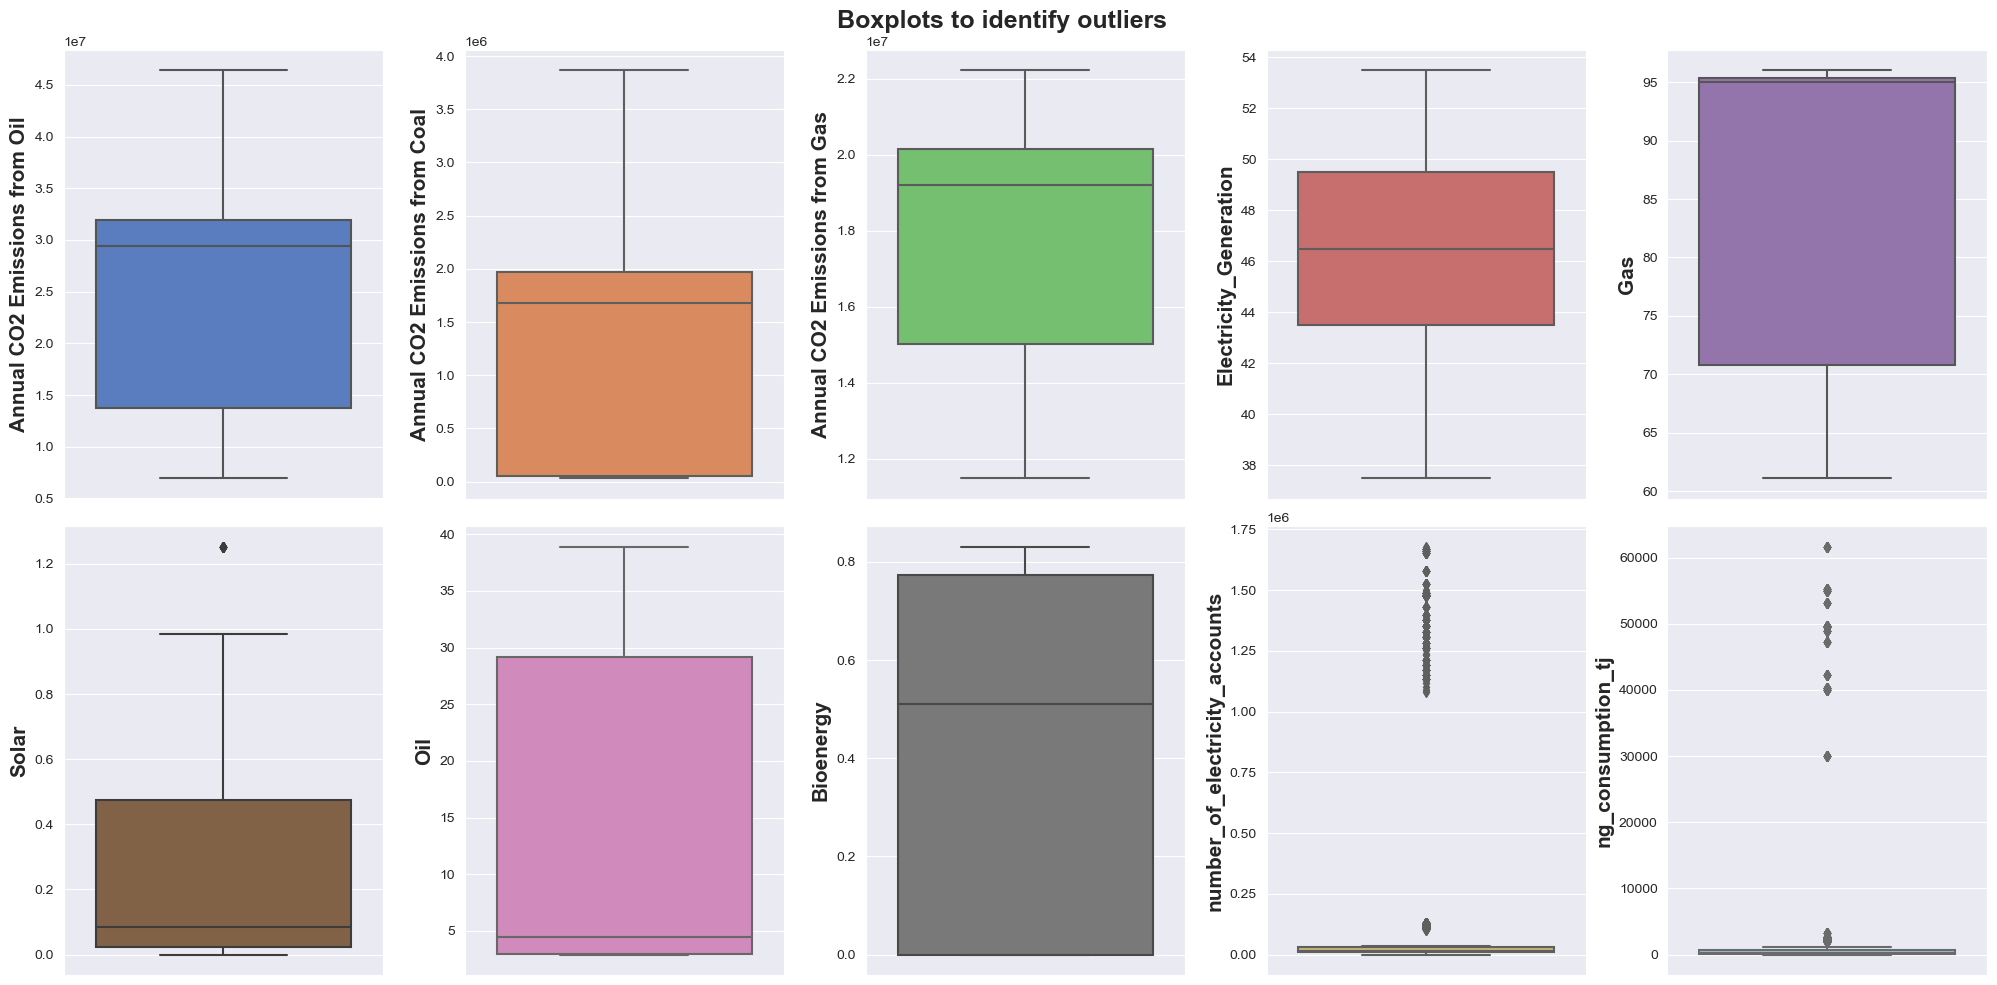

In [15]:
# Boxplots to identify outliers 
# Colour palette variable
colour = sns.color_palette('muted')
sns.set_style("darkgrid")

# Plotting and customization of boxplots
fig, axs = plt.subplots(2,5,figsize=(20,10))
colCnt,rowCnt = 0,0
for item in finalDataset.select_dtypes(include='number').columns[1:]:
    if(finalDataset.loc[:,item].sum() != 0):
        sns.boxplot(y=finalDataset.loc[:,item],ax=axs[rowCnt][colCnt],color=colour[colCnt+rowCnt*5])
        colCnt+=1
        if(colCnt % 5 == 0):
            colCnt = 0
            rowCnt += 1
        plt.tight_layout()

# Customize y label on each boxplot
for ax in axs.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15,fontdict={'fontweight':'bold'})

fig.suptitle("Boxplots to identify outliers",fontweight='bold',size=18)
fig.subplots_adjust(top=0.94)
plt.show()

### Reasons for outliers
- Did not clean solar outlier as for that dataset, only 2021 and 2005 values were used, hence it is needed to show the vast change in solar usage.

- Did not clean for number of electricity account (number_of_electricity_accounts) and natural gas consumption (ng_consumption_tj) as some sectors have very low electricity accounts or natural gas consumption compared to other sectors and are valuable data that is used to show the comparison between each sector, hence should not be removed. 

- Some columns had no boxplot created as the values are 0s only.   

### Gain insights of the final dataset

In [16]:
# Using summarise() function created earlier.
summarise(finalDataset)
# Open full output data in text editor 

Information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      2941 non-null   object 
 1   Year                                        2941 non-null   int64  
 2   Annual CO2 Emissions from Oil               2941 non-null   float64
 3   Annual CO2 Emissions from Coal              2941 non-null   float64
 4   Annual CO2 Emissions from Cement            2941 non-null   float64
 5   Annual CO2 Emissions from Gas               2941 non-null   float64
 6   Annual CO2 Emissions from Flaring           2941 non-null   float64
 7   Annual CO2 Emissions from Other Industries  2941 non-null   float64
 8   Electricity_Generation                      2941 non-null   float64
 9   Coal                                        2941 non-null   f

### Why there are missing values for columns
- Natural gas data, sector_ng, sub_sector_ng, ng_consumption_tj is meant to have missing values from outer merge, hence ignoring them. As natural gas dataset has different year range (2009 - 2020) compared to other datasets (2005 - 2021), hence the data is not dropped if not the year range of final dataset would be limited to 2009 to 2020 only.

### Analyse input variables with descriptive statistics

- .skew() is a pandas function that calculates skewness of dataset values, positive skewness --> more values located on the right (high) end of the data set column, while negative skewness --> more values located on the left (low) end of the dataset.
- .select_dtypes() select columns with specified data type
- .columns return column names/labels in a dataset
- .describe() prints descriptive statistics summary of dataframe.

In [17]:
# Print skewness value for each numerical column in final dataframe
for item in finalDataset.select_dtypes(include='number').columns[1:]:
    if(finalDataset.loc[:,item].sum() != 0):
        skewness = ', data is negatively-skewed.\n'
        if(finalDataset.loc[:,item].skew() > 0):
            skewness=', data is positively-skewed.\n'
        print(item + "'s skewness: " + str(finalDataset.loc[:,item].skew()) + skewness)

# .describe() for descriptive statistics of dataframe
finalDataset.describe()

Annual CO2 Emissions from Oil's skewness: -0.1629453527307106, data is negatively-skewed.

Annual CO2 Emissions from Coal's skewness: 0.4725153713429651, data is positively-skewed.

Annual CO2 Emissions from Gas's skewness: -0.6203028403320643, data is negatively-skewed.

Electricity_Generation's skewness: -0.10430209292049701, data is negatively-skewed.

Gas's skewness: -0.6422115011879638, data is negatively-skewed.

Solar's skewness: 1.0648264897660298, data is positively-skewed.

Oil's skewness: 0.6249887768595491, data is positively-skewed.

Bioenergy's skewness: -0.2828891207174342, data is negatively-skewed.

number_of_electricity_accounts's skewness: 2.430118659567732, data is positively-skewed.

ng_consumption_tj's skewness: 3.474353608555065, data is positively-skewed.



,Year,Annual CO2 Emissions from Oil,Annual CO2 Emissions from Coal,Annual CO2 Emissions from Cement,Annual CO2 Emissions from Gas,Annual CO2 Emissions from Flaring,Annual CO2 Emissions from Other Industries,Electricity_Generation,Coal,Gas,Hydro,Solar,Wind,Oil,Nuclear,Other renewables,Bioenergy,number_of_electricity_accounts,ng_consumption_tj
count,2941.000000,2.941000e+03,2.941000e+03,2941.0,2.941000e+03,2941.0,2941.0,2941.000000,2941.0,2941.000000,2941.0,2941.000000,2941.0,2941.000000,2941.0,2941.0,2941.000000,2.941000e+03,2856.000000
mean,2014.352601,2.352847e+07,1.348612e+06,0.0,1.819119e+07,0.0,0.0,46.835556,0.0,86.460641,0.0,0.278416,0.0,12.816455,0.0,0.0,0.454203,1.809549e+05,3915.769643
std,3.648005,1.107313e+07,1.122340e+06,0.0,2.638779e+06,0.0,0.0,3.648782,0.0,11.385644,0.0,0.327349,0.0,11.934875,0.0,0.0,0.360427,4.429996e+05,12376.995014
min,2005.000000,6.933074e+06,2.931200e+04,0.0,1.147460e+07,0.0,0.0,37.480965,0.0,61.074917,0.0,0.000000,0.0,2.911831,0.0,0.0,0.000000,1.800000e+02,0.000000
25%,2011.000000,1.377664e+07,5.129900e+04,0.0,1.500774e+07,0.0,0.0,43.482241,0.0,70.803760,0.0,0.022462,0.0,3.007075,0.0,0.0,0.000000,8.920000e+03,79.875000
50%,2014.000000,2.939011e+07,1.678112e+06,0.0,1.921402e+07,0.0,0.0,46.482879,0.0,94.974450,0.0,0.085179,0.0,4.429302,0.0,0.0,0.511073,1.357000e+04,199.100000
75%,2017.000000,3.194399e+07,1.971232e+06,0.0,2.015566e+07,0.0,0.0,49.483518,0.0,95.353050,0.0,0.474965,0.0,29.173347,0.0,0.0,0.773773,3.015000e+04,701.925000
max,2021.000000,4.639440e+07,3.865520e+06,0.0,2.222525e+07,0.0,0.0,53.484369,0.0,96.008960,0.0,1.252805,0.0,38.925083,0.0,0.0,0.831189,1.678920e+06,61665.300000


### Changing fonts and fontweight of all plots

In [18]:
# Change fonts and font weight
plt.rcParams["axes.titleweight"] = "semibold"
plt.rcParams["axes.labelweight"] = "semibold"
plt.rcParams['font.family'] = 'Century Gothic'

# Plotting of charts for insights
## Chart #1 | Electricity Accounts by Sector in Singapore

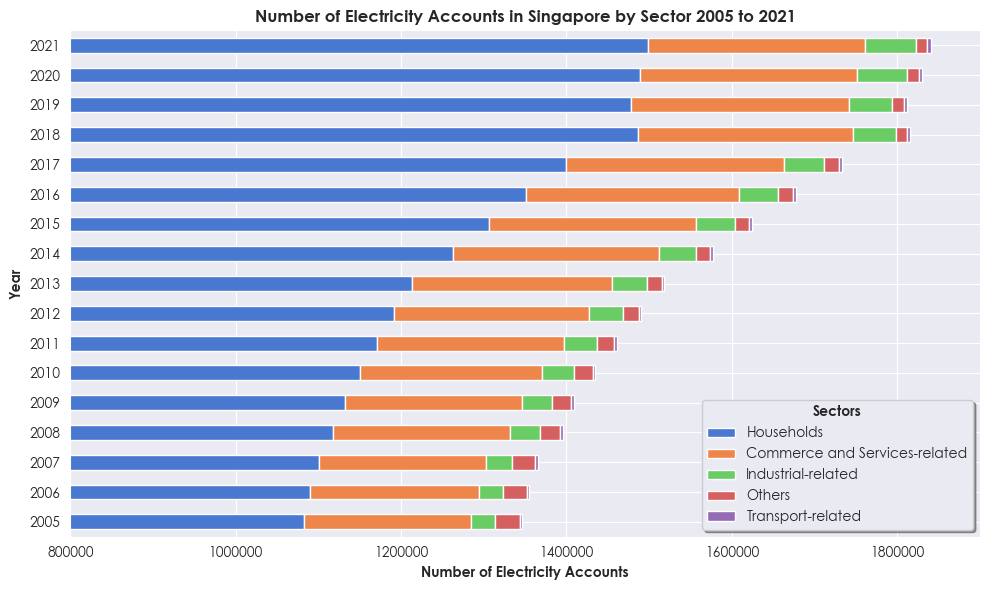

In [19]:
# Index out columns needed. 
electricityAccount_filtered = finalDataset[['Year','sector','number_of_electricity_accounts']]
electricityAccount_filtered = electricityAccount_filtered[~electricityAccount_filtered['sector'].isin(['Overall'])].drop_duplicates().groupby(['Year','sector']).sum().unstack()
electricityAccount_filtered = electricityAccount_filtered['number_of_electricity_accounts'][['Households','Commerce and Services-related', 'Industrial-related','Others', 'Transport-Related']]

# Plotting & customization.
fig,ax = plt.subplots(figsize=(10,6))
electricityAccount_filtered.plot(kind='barh',stacked=True,ax=ax,color=colour,xlim=(800000,1900000),xlabel=(range(800000,1800000,200000))).set(ylabel="Year",xlabel='Number of Electricity Accounts',title="Number of Electricity Accounts in Singapore by Sector 2005 to 2021")
plt.legend(labels=['Households','Commerce and Services-related','Industrial-related','Others','Transport-related'],title="Sectors",shadow=True,title_fontproperties={'weight':'bold'})
plt.ticklabel_format(style='plain',axis='x')
plt.tight_layout()
plt.show()

### Insights - Chart 1
- Number of electricity accounts increasing in each sector in general over the years from 2005 to 2021

- Mainly contributing from Household sector, likely due to increase in number of housing in Singapore

- Shows increase in demand for electricity in Singapore, likely due to increased population

## Chart #2 | Electricity Accounts against Electricity Generation in Singapore

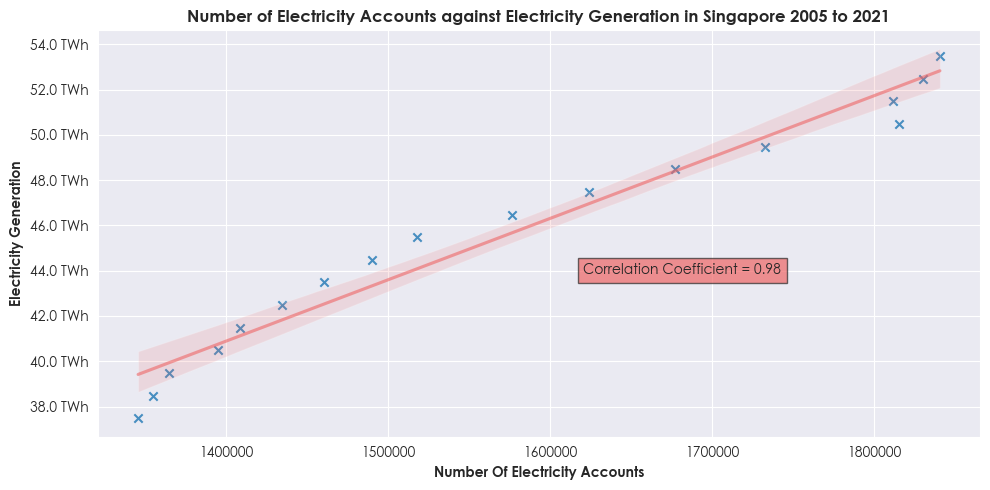

In [20]:
# Index, rename and merge Columns needed.
electricityAccounts_reg = electricityAccount_filtered.stack().groupby("Year").sum()
electricityAccounts_reg = electricityAccounts_reg.reset_index()
electricityAccounts_reg.columns.values[1] = "number_of_electricity_accounts"
electricityGeneration_filtered = finalDataset[['Year','Electricity_Generation']]
electMerge = pd.merge(electricityAccounts_reg,electricityGeneration_filtered,how="inner",on='Year').drop_duplicates().groupby('Year').mean()

# Plotting and Customization.
fig,ax = plt.subplots(figsize=(10,5))
sns.regplot(electMerge,x='number_of_electricity_accounts',y="Electricity_Generation",ax=ax,marker='x',line_kws={"color": "#ee6666",'alpha':0.6}).set(xlabel='Number Of Electricity Accounts', title='Number of Electricity Accounts against Electricity Generation in Singapore 2005 to 2021')
plt.ticklabel_format(axis='x',style='plain')
ax.set_ylabel("Electricity Generation")
ax.yaxis.set_major_formatter('{x} TWh')

# Getting Correlation coefficient and adding it as text into chart
correlation = electMerge.corr().loc['number_of_electricity_accounts','Electricity_Generation']
plt.text(.55,.4,'Correlation Coefficient = {:.2f}'.format(correlation),transform=ax.transAxes,bbox=dict(facecolor='#ee6666',alpha=0.7,edgecolor='#2a2a2a'))

plt.tight_layout()
plt.show()

### Insights - Chart 2

- Correlation coefficient of 0.98 -> Strong positive linear relationship between Electricity Generation and Number of Electricity Accounts -> As electricity accounts increase, electricity generation similarly increases.

- As demand of electricity increases -> Singapore ensures to similarly increase electricity generation to meet demands -> Proper management of electricity generation

## Chart #3 | Annual CO2 Emissions in Singapore

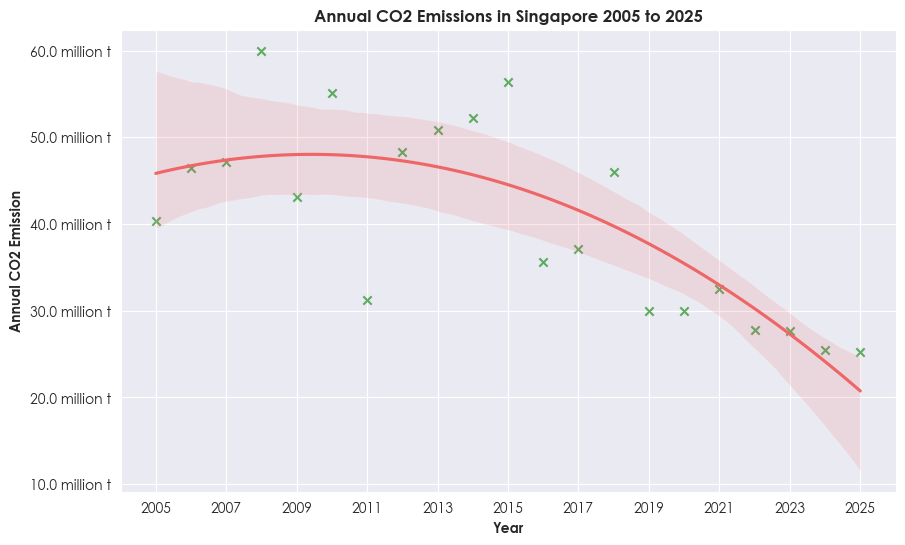

In [21]:
# Import warnings to ignore them from statsmodel forecasting.
import warnings
warnings.filterwarnings('ignore')

# Index out columns needed.
annualCO2_filtered = finalDataset.iloc[:,1:8].set_index('Year').drop_duplicates().sum(axis=1)
annualCO2_filtered = annualCO2_filtered.apply(divide)

# Statsmodel forecasting for additional 4 years (2022 to 2025)
mod = sm.tsa.SARIMAX(endog=annualCO2_filtered,order=(1,1,0),trend=[1,1,0,1])
res = mod.fit()
fcast = res.get_forecast(steps=4).summary_frame()
fcast.index = range(2022,2026,1)

# Concatenating forecasted value to dataframe to be plotted
annualCO2_filtered = pd.concat([annualCO2_filtered,fcast['mean']],axis=0)

# Plotting & customization.
fig,ax = plt.subplots(figsize=(10,6))
sns.regplot(ax=ax,x=annualCO2_filtered.index,y=annualCO2_filtered,marker='x',scatter_kws={"color": "green",'alpha':0.6}, line_kws={"color": "#EE6666"},order=2).set(title="Annual CO2 Emissions in Singapore 2005 to 2025",ylabel="Annual CO2 Emission",xlabel='Year')
ax.ticklabel_format(style='plain')
ax.set_xticks(range(2005,2026,2))
ax.yaxis.set_major_formatter('{x} million t')
plt.show()

### Insights - Chart 3

- Annual CO2 Emissions decreasing over the years, and is expected to continue to decrease, even though electricity generation increasing

- Highlight good management of CO2 emission levels in Singapore -> Increase energy & electricity output while decreasing annual CO2 emissions

- Amount of emission per unit of energy generated (carbon intensity) decreasing over the years


## Chart #4 | Electricity sources in Singapore in 2005 and 2021

In [22]:
# Index out data needed. maybe explode oil?
energySources_filtered_2021 = finalDataset[finalDataset['Year'] == 2021].iloc[:,9:18]
energySources_filtered_2005 = finalDataset[finalDataset['Year'] == 2005].iloc[:,9:18]

# Plotting and customizing.
fig = make_subplots(1,2,specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['2005','2021'])
fig.add_trace(go.Pie(labels=energySources_filtered_2005.columns,values=energySources_filtered_2005.values[0],pull=[0,0.2]),1,1)
fig.add_trace(go.Pie(labels=energySources_filtered_2021.columns,values=energySources_filtered_2021.values[0],pull=[0,0,0,0,0,0.2]),1,2)
fig.update_traces(textposition='inside', textinfo='label+percent',hoverinfo='label+percent') 
fig.update_layout(
    legend=dict(bordercolor='#dadade',borderwidth=2,bgcolor="#f0ecf4"),
    legend_title_text="<b>Energy Sources</b>",
    margin=dict(l=0,r=250,t=50,b=10),
    title_text='<b>Percentage of Electricity Source in Singapore</b>',
    title_x=0.28,
    font_family='Century Gothic',
    font=dict(size=16)
)

### Insights - Chart 4

- Electricity source in Singapore is changing over the years, Singapore diversifying their electricity mix

- Singapore decrease reliance on oil, use more natural gases, and implement renewable energy sources eg. Bioenergy and Solar energy

- Decrease carbon intensity -> Lesser emissions -> Highlight effectiveness of diversifying electricity mix + using cleaner and renewable sources of energy

## Chart #5 | Annual CO2 Emissions by Fuel Type

      Annual CO2 Emissions from Oil  Annual CO2 Emissions from Coal  \
Year                                                                  
2005                      28.803750                        0.043964   
2006                      34.067870                        0.029312   
2007                      33.881010                        0.051296   
2008                      46.394396                        0.032974   
2009                      29.390112                        0.032974   
2010                      40.156450                        0.051299   
2011                      16.165567                        0.032976   
2012                      31.943994                        0.109912   
2013                      31.422464                        1.135840   
2014                      31.360176                        1.678112   
2015                      35.161124                        1.678112   
2016                      13.776640                        1.832000   
2017  

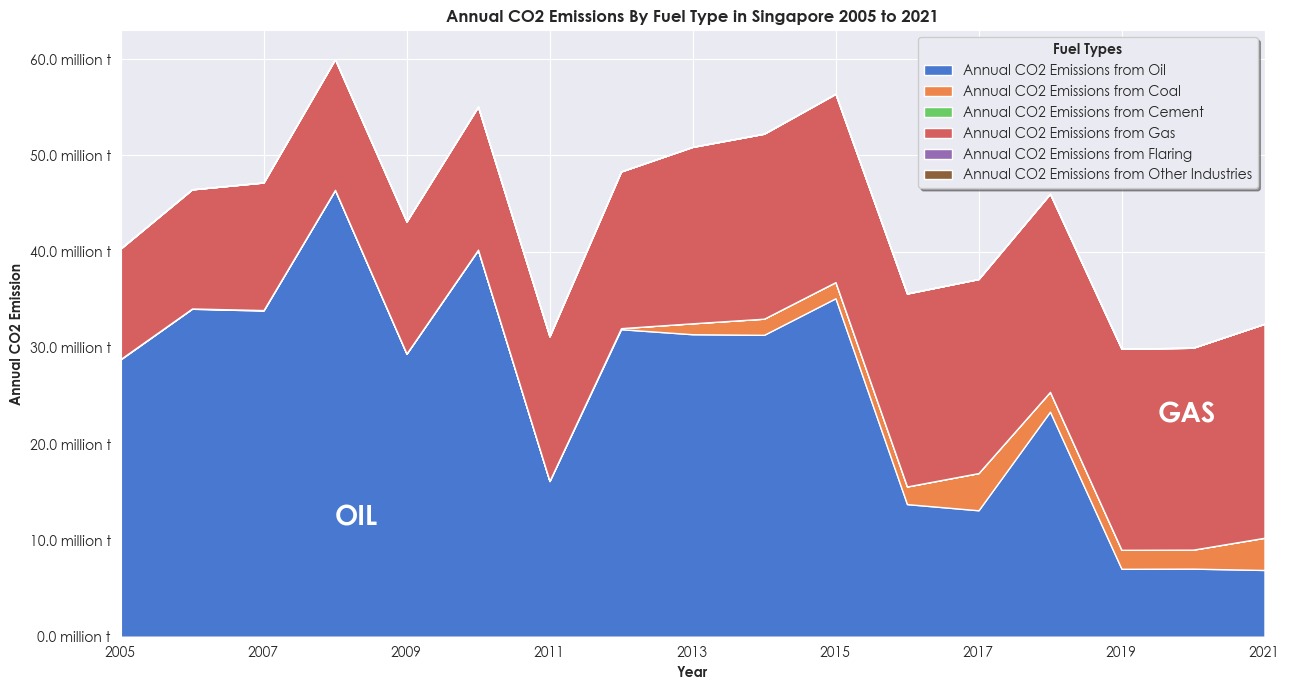

In [23]:
# Index and declare variables for plotting.
emissionByFuel_filtered = finalDataset.iloc[:,1:8].set_index('Year').groupby("Year").mean().apply(divide)
print(emissionByFuel_filtered)
oil = emissionByFuel_filtered.iloc[:,0]
coal = emissionByFuel_filtered.iloc[:,1]
cement = emissionByFuel_filtered.iloc[:,2]
gas = emissionByFuel_filtered.iloc[:,3]
flaring = emissionByFuel_filtered.iloc[:,4]
other = emissionByFuel_filtered.iloc[:,5]

# Plotting and customization
fig,ax = plt.subplots(figsize=(13,7))
ax.stackplot(emissionByFuel_filtered.index,oil,coal,cement,gas,flaring,other,colors=colour)
ax.legend(labels=emissionByFuel_filtered.columns,title='Fuel Types',shadow=True,title_fontproperties={'weight':'bold'})
ax.set_xlim(2005,2021)
ax.set_title("Annual CO2 Emissions By Fuel Type in Singapore 2005 to 2021")
ax.set_ylabel("Annual CO2 Emission")
ax.set_xlabel("Year")
ax.set_xticks(range(2005,2022,2))
ax.yaxis.set_major_formatter('{x} million t')

# Annotating oil and gas area on chart
loc = gas.values.argmax()
ax.text(gas.index[loc]-1.5,gas.to_numpy()[loc], 'GAS',fontdict=dict(fontsize=20,fontweight='bold',color='#ffffff'))
loc = oil.values.argmax()
ax.text(oil.index[loc],oil.to_numpy()[loc]*0.25, 'OIL',fontdict=dict(fontsize=20,fontweight='bold',color='#ffffff'))

plt.tight_layout()
plt.show()

### Insights - Chart 5

- Highlight importance of adopting natural gas

- Annual CO2 emissions decreased due to decrease in reliance on oil and increased transition to natural gases

- As natural gas more energy-efficient -> more energy produced per unit compared to oil + burn cleaner than oil -> decrease CO2 emissions while increasing energy output

## Chart #6 | Natural Gas Consumption by Sector in Singapore

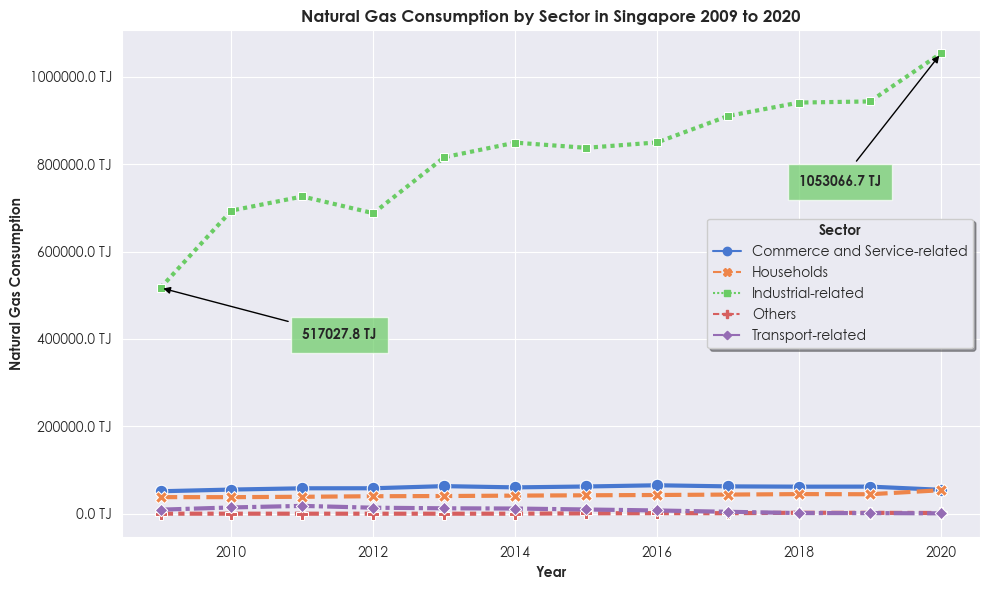

In [24]:
# Indexing and declaring variables 
ngConsumption = finalDataset[['Year','sector_ng','sub_sector_ng','ng_consumption_tj']].groupby(['Year','sector_ng']).sum()
ngConsumption.reset_index(inplace=True)
industrial_ngConsumption = ngConsumption[ngConsumption['sector_ng'] == 'Industrial-related']
ngConsumption = ngConsumption.pivot(index='Year',columns='sector_ng',values='ng_consumption_tj')

# Plotting and Customization
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=ngConsumption,linewidth=3,markers=True,markersize=9,palette=colour[:5]).set(title='Natural Gas Consumption by Sector in Singapore 2009 to 2020',xlabel='Year',ylabel='Natural Gas Consumption')
legend = plt.legend(shadow=True,loc='center right',title='Sector',title_fontproperties={'weight':'bold'})
legend.get_texts()[3].set_text("Others")
legend.get_texts()[4].set_text("Transport-related")
ax.yaxis.set_major_formatter('{x} TJ')

# Annotating chart for industrial related
ax.annotate(str(round(np.interp(2009,industrial_ngConsumption['Year'],industrial_ngConsumption['ng_consumption_tj']),2)) + " TJ",xy=(2009,np.interp(2009,industrial_ngConsumption['Year'],industrial_ngConsumption['ng_consumption_tj'])),xytext=(2011,400000),arrowprops={'color':'black',"arrowstyle":"-|>"},bbox={'facecolor':'#6acc64', 'alpha':0.7, 'pad':8},fontweight="bold")
ax.annotate(str(round(np.interp(2020,industrial_ngConsumption['Year'],industrial_ngConsumption['ng_consumption_tj']),2)) + " TJ",xy=(2020,np.interp(2020,industrial_ngConsumption['Year'],industrial_ngConsumption['ng_consumption_tj'])),xytext=(2018,750000),arrowprops={'color':'black',"arrowstyle":"-|>"},bbox={'facecolor':'#6acc64', 'alpha':0.7, 'pad':8},fontweight="bold")

plt.tight_layout()
plt.show()

### Insights - Chart 6 

- Natural gas mainly used in industrial-related sectors shown by consumption of natural gases in industrial increasing by twofolds from 2005 to 2020

- Small dip in consumption in 2011 to 2012 as there was a decrease in usage of gas while slight increase in usage of oil as energy source

- Shows that by transitioning electricity sources in industrial-related sectors to cleaner sources, it would help significantly to reduce CO2 emissions.

# Conclusions

→ Singapore has good management of electricity generation

→ Singapore handles emissions levels well

→ Singapore prioritises exploring cleaner energy sources

→ Natural gas is effective in curbing emission levels

→ Natural gas is able to impact emission levels the most when transitioned into industrial-related sectors compared to other sectors